<a href="https://colab.research.google.com/github/ppunia74/INDE-577_Fall2022/blob/main/SupervisedLearning/5%20-%20Neural%20Network/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Multilayer Perceptron Learning Algorithm

## Introduction

#### The goal of learning
MLP algorithm has four elements:

* Input features
* Weights and bias
* Weighted sum (net sum)
* Activation function

The objective is to identify weights and biases that can best predict the output true label/value. 

#### The Activation Function

The activation function is used to convert perceptron output. There are two activation functions often used in MLP, sigmoid and ReLU. 

This notebook uses the **sigmoid** function.

$$\sigma(z)=\frac {1}{1+e^{-z}}$$


Define $L$ is the number of layers, for $l=1,...,L-1$, the preactivation phase is
$$z^l=w^l a^{l-1}+b^l$$

The postactivation phase is
$$a^l=\sigma(z^l)$$
and $a^0=x$.

Another commonly used activation function is **ReLU**, Rectified Linear Units. 

$$R(z)= max(0,z)$$

The function returns $0$ when the input is negative, and returns the input value when the input is positive. 



#### The Loss Function

The loss function is a function represents the differences between the actual value and the predicted value. Loss function provides useful information to update the weights and biases, to minimize the differences, or loss. The total loss of the model would be the sum of the loss on each input data.

In our algorithm, we use the Mean Square Error:

$$C(w,b;x,y)=\frac{1}{2} \sum_{i=1}^n(a_i^{l-1}-y_i)^2$$

#### Output Error

The output error is

$$\delta^{l-1}=\triangledown_{a^{l-1}}C \otimes \sigma'(z^{l-1})$$

#### Neuron Error

According to the output error, for $l=L-2,...,1$, the neuron error is

$$\delta^{l}=\left ( (w^{l+1})^T a^{l+1} \right ) \otimes \sigma'(z^{l})$$

#### Stochastic Gradient Descent (SGD)

To optimize the parameters, again, we use the idea of gradient descent algorithm. In practice, usually a modification of the gradient descent is used, especially when the dataset is big. In Stochastic Gradient Descent, in each iteration, one data point from the whole dataset is selected randomly and calculated the gradient. Because of the randomness in the SGD, it usually takes a higher number of iterations to reach the minimum.

In each epoch of SGD, the working flow is: 1) take an example; 2) feed to the neural network; 3) calculate the gradient and update the weights; 4) repeat 1-3 until the loss converges or reach the maximum number of iteration. 

Combine with our algorithm, for $l=1,...,L-1$, to update the weights,

$$w^l = w^l - \alpha \delta^l (a^{l-1})^T$$
where $\alpha$ is the learning rate.

#### Mini-Batch Gradient Descent

Mini-batch gradient descent is the most common implementation of gradient descent in deep learning or neural network. Instead of using the whole dataset for computation, in mini-batch gradient descent, the training dataset is split into small batches (mini-batches), and these mini-batches are used to calculate and update the gradient. Mini-batch gradient descent can greatly speed up the algorithm.

In one epoch of the mini-batch gradient descent, the working flow is: 1) pick a mini-batch; 2) feed to the neural network; 3) calculate the mean gradient and update the weights; 4) repeat 1-3 for the generated mini-batches.

---

## Implementation

This notebook implements MLP with a single input layer with $784$ input nodes, 2 hidden layers of arbitrary size ($60$ nodes per layer), and $10$ output nodes. These layers will be denoted $L^0, L^1, L^2,$ and $L^{3}$, respectively. 

I use sigmoid function and Mean Squared Error as the activation function and loss function respectively.

For $l = 1, 2, 3$, layer $l$ will have two phases:

* The preactivation phase $z^l = W^la^{l-1} + b^l,$ 
* The postactivation phase $a^l = \sigma(z^l).$ 

The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through a chosen activation function element wise. For notational convenience, we let $a^0 = x$, where $x$ is the current input data into our network. 

### About the Fashion MNIST Dataset

The [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/) dataset ia an alternative dataset to the MNIST. It consists of $70000$ $28\times 28$ grayscale images of $10$ fashion categories, $60000$ of which are typically used as labeled training examples, while the other $10000$ are used for testing your learning model on. The following picture represent a sample of some of the images.


<img src="Image/fashion_mnist-3.0.1.png" alt="Drawing" style="width: 500px;"/>


Like the images above, each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

### Task

To classify fashion categories using the Multilayer Perceptron Learning algorithm based on the Fashion MNIST dataset.

* Build the algorithm with the stochastic gradient descent strategy and the mini-batch gradient descent strategy, and simply compare the performance.

* Increase the number of the nodes in the hidden layers to see whether it can improve the performance of the algorithm.

* Add ReLU as another activation function, and compare the performance of the algorithms with different activation functions.


### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [tensorflow](https://www.tensorflow.org/)

To load the Fashion MNIST data, we also need to import [keras.dataset](https://keras.io/api/datasets/).

In [ ]:
# Import the necessary libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

### Data Pre-Processing

In [ ]:
# Load the Fashion MNIST data
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# shape of the training set
train_X.shape

(60000, 28, 28)

In [ ]:
# shape of the first matrix in the training set
train_X[0].shape

(28, 28)

In [ ]:
# shape of the test set
test_X.shape

(10000, 28, 28)

The training set has $60000$ pictures with $28 \times 28$ pixel. The test set has $10000$ pictures with the same $28 \times 28$ pixel. 

First data point in the training set.

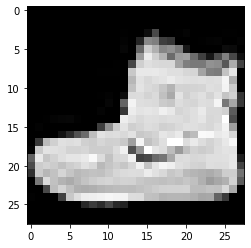

In [ ]:
# Show the first matrix in the training set
plt.imshow(train_X[0], cmap="gray")

In [ ]:
# first label of the training set
train_y[0]

9

The matrix and the label match with true label (9: Ankle boot).


Evaluates the range of the grey scale ( 𝑥 ) in the training matrics. If the range is big, it may require scaling.

In [ ]:
np.max(train_X)

255

In [ ]:
np.min(train_X)

0

In [ ]:
np.max(test_X)

255

In [ ]:
np.min(test_X)

0

The the range of the grey scale ($x$) is $(0, 255)$, and thus, it requires scaling. To scale it divide it by the maximun value.

In [ ]:
# Scale down X
train_X = train_X/255
test_X = test_X/255

Thereafter, reshape the input matrics ($X$) and output matrics ($y$) to a desire pattern that can fit our algorithm.

First, for the input matrics ($X$), we need to flatten the $28 \times 28$ matrix, and reshape it to a $784 \times 1$ vector.

In [ ]:
# X will temp store flattened matrices
X = []
for x in train_X:
  X.append(x.flatten().reshape(784, 1))

Second, for the output matrics ($y$), it is a single number, and we need to do the One Hot Encoding and represent it using a $10 \times 1$ vector. The idea is just the same as we did for the digits. For example, 

$$y=9 \overset{\text {One Hot encode}}{\rightarrow} y =\begin{bmatrix}
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
0\\ 
1
\end{bmatrix}$$

In [ ]:
# Y will temp store one-hot encoded label vectors
Y = []
for y in train_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

In [ ]:
# Our data will be stored as a list of tuples
train_data = [p for p in zip(X, Y)]

So far, the "train_data" would have one column with the flattened $X$ vectors and the one column with the One Hot encoded label vectors. For better understanding of data pick the first data point and print the One Hot encoded label and the original true value to check the transformation.

In [ ]:
p = train_data[0]
print(p[1])
print(train_y[0])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
9


The transformation is correct! Repeat the same for the test set.

In [ ]:
X = []
for x in test_X:
  X.append(x.flatten().reshape(784, 1))

Y = []
for y in test_y:
  temp_vec = np.zeros((10, 1))
  temp_vec[y][0] = 1.0
  Y.append(temp_vec)

test_data = [p for p in zip(X, Y)]

---

### Build the Algorithm

To build the algorithm, there are several functions need to be defined.

#### Activation Function
Use  sigmoid function as the activation function, 
$$\sigma(z)=\frac {1}{1+e^{-z}}$$

In [ ]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z)*(1.0-sigmoid(z))#### Loss Function

#### Loss Function
we use the Mean Sqaure Error cost:
$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n(a^i - y^i)^2.
$$

In [ ]:
def mse(a, y):
  return .5*sum((a[i]-y[i])**2 for i in range(10))[0]

#### The Function to Initialize the Weights and Bias

For algorithm implementations fix the number of nodes in the four layers to be $748$, $60$, $60$, and $10$, repectively. And thus, the dimemsions of the weights are ($60$, $784$), ($60$, $60$), ($10$, $60$), repectively, and the dimensions of the bias are ($60$, $1$), ($60$, $1$), ($10$, $1$), repectively. 

To increase efficiency use scaling initializer while intializing.

In [ ]:
def initialize_weights(layers = [784, 60, 60, 10]):
  W = [[0.0]]  #add weight_0, to match the shape
  B = [[0.0]]
  for i in range(1, len(layers)):
    w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])  #Scaling initializer to scale the shape
    b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

    W.append(w_temp)
    B.append(b_temp)
  return W, B

Let's check!

In [ ]:
W, B = initialize_weights()

In [ ]:
x, y = train_data[0]

First layer:

In [ ]:
a0 = x
z1 = (W[1] @ a0) + B[1]
a1 = sigmoid(z1)

In [ ]:
a1.shape

(60, 1)

The shape of the output of the first layer match the desire dimension.

Second layer:

In [ ]:
z2 = (W[2] @ a1) + B[2]
a2 = sigmoid(z2)
print(a2.shape)

(60, 1)


The shape of the output of the second layer match the desire dimension.

And the third layer:

In [ ]:
z3 = (W[3] @ a2) + B[3]
a3 = sigmoid(z3)
print(a3.shape)

(10, 1)


The shape of the output of the thired layer match the desire dimension.

These results suggest that the "innitialize_weights" function works well. And then, we can put the input and output of the layers together.

In [ ]:
W, B = initialize_weights(layers=[784, 60, 60, 10])
x, y = train_data[0]
Z = [[0.0]]
A = [x]
L = len(B)
for i in range(1, L):
  z = (W[i] @ A[i-1]) + B[i]
  a = sigmoid(z)

  Z.append(z)
  A.append(a)

To check whether the loop works well, we can print the shape of the output of the layer before the last layer:

In [ ]:
A[-1].shape

(10, 1)

The shape is correct!

#### Output Error

The output error is

$$\delta^{l-1}=\triangledown_{a^{l-1}}C \otimes \sigma'(z^{l-1})$$

In [ ]:
# Measure the output error
deltas = dict()
delta_last = (A[-1] - y)*sigmoid_prime(Z[-1])
deltas[L-1] = delta_last

In [ ]:
deltas[L-1]

array([[ 0.08962885],
       [ 0.05047468],
       [ 0.12778803],
       [ 0.1372199 ],
       [ 0.10189851],
       [ 0.13600673],
       [ 0.14002645],
       [ 0.14771075],
       [ 0.0551474 ],
       [-0.11068193]])

#### Neuron Error

According to the output error, for $l=L-2,...,1$, the neuron error is

$$\delta^{l}=\left ( (w^{l+1})^T a^{l+1} \right ) \otimes \sigma'(z^{l})$$

In [ ]:
# calculate the neuron error
for l in range(L-2, 0, -1):
  deltas[l] = (W[l+1].T @ deltas[l+1])*sigmoid_prime(Z[l])

In [ ]:
deltas[1].shape

(60, 1)

In [ ]:
deltas[2].shape

(60, 1)

In [ ]:
deltas[3].shape

(10, 1)

The dimensions of the outputs of the layers are all correctly, suggesting that the codes for the output error and the neuron error work correctly.

The gradient descent will be used to optimize the algorithm.

In [ ]:
# Set the learning rate
alpha = 0.04

In [ ]:
# To update the weights and bias
for i in range(1, 4):
  W[i] = W[i] - alpha*deltas[i]@A[i-1].T
  B[i] = B[i] - alpha*deltas[i]

#### Feedforward Process

In [ ]:
def forward_pass(W, B, p, predict_vector = False):
  Z =[[0.0]]
  A = [p[0]]
  L = len(W)
  for i in range(1, L):
    z = (W[i] @ A[i-1]) + B[i]
    a = sigmoid(z)

    Z.append(z)
    A.append(a)

  if predict_vector == True:
    return A[-1]
  else:
    return Z, A

#### Store the Neuron Errors

In [ ]:
def deltas_dict(W, B, p):
  Z, A = forward_pass(W, B, p)
  L = len(W)
  deltas = dict()
  deltas[L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
  for l in range(L-2, 0, -1):
    deltas[l] = (W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

  return A, deltas

#### Average of Mean Squared Error

This is to evaluate the overall performance for each step (epoch/mini-batch depends on settings).

In [ ]:
def MSE(W, B, data):
  c = 0.0
  for p in data:
    a = forward_pass(W, B, p, predict_vector=True)
    c += mse(a, p[1])
  return c/len(data)

---

### Implement the Algorithm

In [ ]:
# Calculate the initial cost
W, B = initialize_weights()
print(f"Initial Cost = {MSE(W, B, train_data)}")

Initial Cost = 0.9840678248837732


Predicted Value = 8
Actual Value = 8


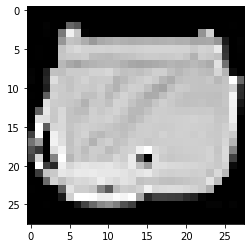

In [ ]:
# Show the performance
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

The prediction is correct. 

Next, we train the model using Stochasitc Gradient Descent strategy.

#### Stochasitc Gradient Descent

First, we define a SGD function.

In [ ]:
def stochastic_gradient_descent(W, B, data, alpha = 0.04, epochs = 3):
  L = len(W)
  print(f"Initial Cost = {MSE(W, B, data)}")
  for k in range(epochs):
    for p in data:
      A, deltas = deltas_dict(W, B, p)
      for i in range(1, L):
        W[i] = W[i] - alpha*deltas[i]@A[i-1].T
        B[i] = B[i] - alpha*deltas[i]
    print(f"{k} Cost = {MSE(W, B, data)}")

Let's train the model!

In [ ]:
stochastic_gradient_descent(W, B, train_data)

Initial Cost = 0.9840678248837732
0 Cost = 0.12585022684978747
1 Cost = 0.10870673529526544
2 Cost = 0.10030714201549572


The costs of every epoch gradually decrease. The training process works well.

We can also take a look at one example.

Predicted Value = 2
Actual Value = 2


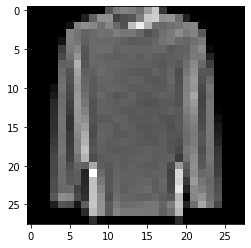

In [ ]:
i = np.random.randint(0, len(test_X))
prediction = np.argmax(forward_pass(W, B, test_data[i], predict_vector=True))
print(f"Predicted Value = {prediction}")
print(f"Actual Value = {test_y[i]}")
plt.imshow(test_X[i], cmap="gray")
plt.show()

The prediction is correct!

We can put all the functions together to make a class. In the meantime, we also define another strategy, **mini-batch gradient descent** to optimize the algorithm.


In [ ]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)


  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = sigmoid(z)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*sigmoid_prime(Z[-1])
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * sigmoid_prime(Z[l])

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

    
  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
        for j in range(0, data_length-batch_size, batch_size):
            delta_list = []
            A_list = []
            for p in data[j:j+batch_size]:
                A, deltas = self.deltas_dict(p)
                delta_list.append(deltas)
                A_list.append(A)
                
                for i in range(1, self.L):
                    self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
                    self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

Let's try our class!

We can also setup 60 nodes for both hidden layers.

In [ ]:
net = MultilayerPerceptron(layers=[784, 60, 60, 10])

To use the stochastic gradient descent strategy:

In [ ]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.2941962232412443
2 Cost = 0.10060246671784645


To use the mini-batch gradient descent strategy:

In [ ]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.10060246671784645
2 Cost = 0.09062533380206184


Compare these two strategy, the mini-batch gradient descent has a smaller cost than the stochastic gradient descent. 

Notably, stochastic gradient descent is more efficient than the min-batch gradient descent.

---

### Increase the Number of Nodes in the Hidden Layers

Fix 100 nodes for both hidden layers!

In [ ]:
net = MultilayerPerceptron(layers=[784, 100, 100, 10])

To use the stochastic gradient descent strategy:

In [ ]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 1.251343449536513
2 Cost = 0.10116114711696111


To use the mini-batch gradient descent strategy:

In [ ]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.10116114711696111
2 Cost = 0.09174023099829133


The mini-batch gradient descent still has a smaller cost than the stochastic gradient descent. 

Increasing the number of nodes in the hidden layers does not greatly change the loss in this case.

---

### Add ReLU as Another Activation Function

The ReLU function is 
$$R(z)= max(0,z)$$

The derivation of the ReLU function is

$$R'(z)= \left\{\begin{matrix}
0, \text{ if }z < 0\\ 
1, \text{ if }z > 0
\end{matrix}\right.$$


In [ ]:
def ReLU(z):
  return np.maximum(0, z)

def ReLU_prime(z):
    if z > 0:
        return 1.0
    else:
        return None 

In [ ]:
ReLU(10)

10

In [ ]:
ReLU_prime(10)

1.0

Then we can add the ReLU function and modify the "MultilayerPerceptron" class:
* Add another parameter, "activation_type"
* Define "activation" function, which returns the value of the specified activation function
* Define "activation_prime" function, which returns the value of the derivation of the specified activation function
* Modified other function to call the "activation" and "activation_prime" functions

In [ ]:
class MultilayerPerceptron():
  
  def __init__(self, layers = [784, 60, 60, 10], activation_type = 'sigmoid'):
    self.layers = layers
    self.activation_type = activation_type
    self.L = len(self.layers)
    self.W =[[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)

  def reset_weights(self, layers = [784, 60, 60, 10]):
    self.layers = layers
    self.L = len(self.layers)
    self.W = [[0.0]]
    self.B = [[0.0]]
    for i in range(1, self.L):
      w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
      b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])

      self.W.append(w_temp)
      self.B.append(b_temp)
        
  def activation(self, z, type):
    if type == "sigmoid":
        return 1.0/(1.0+np.exp(-z))
    elif type == "ReLU":
        return np.maximum(0, z)
    else:
        return None

  def activation_prime(self, z, type):
    if type == "sigmoid":
        return sigmoid(z)*(1.0-sigmoid(z))
    elif type == "ReLU":
        return np.where(z > 0, 1.0, 0)
    else:
        return None
       
  def forward_pass(self, p, predict_vector = False):
    Z =[[0.0]]
    A = [p[0]]
    for i in range(1, self.L):
      z = (self.W[i] @ A[i-1]) + self.B[i]
      a = self.activation(z, self.activation_type)
      Z.append(z)
      A.append(a)

    if predict_vector == True:
      return A[-1]
    else:
      return Z, A

  def MSE(self, data):
    c = 0.0
    for p in data:
      a = self.forward_pass(p, predict_vector=True)
      c += mse(a, p[1])
    return c/len(data)

  def deltas_dict(self, p):
    Z, A = self.forward_pass(p)
    deltas = dict()
    deltas[self.L-1] = (A[-1] - p[1])*self.activation_prime(Z[-1], self.activation_type)
    for l in range(self.L-2, 0, -1):
      deltas[l] = (self.W[l+1].T @ deltas[l+1]) * self.activation_prime(Z[l], self.activation_type)

    return A, deltas

  def stochastic_gradient_descent(self, data, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    for k in range(epochs):
      for p in data:
        A, deltas = self.deltas_dict(p)
        for i in range(1, self.L):
          self.W[i] = self.W[i] - alpha*deltas[i]@A[i-1].T
          self.B[i] = self.B[i] - alpha*deltas[i]
    print(f"{k} Cost = {self.MSE(data)}")

    
  def mini_batch_gradient_descent(self, data, batch_size = 15, alpha = 0.04, epochs = 3):
    print(f"Initial Cost = {self.MSE(data)}")
    data_length = len(data)
    for k in range(epochs):
        for j in range(0, data_length-batch_size, batch_size):
            delta_list = []
            A_list = []
            for p in data[j:j+batch_size]:
                A, deltas = self.deltas_dict(p)
                delta_list.append(deltas)
                A_list.append(A)
                
                for i in range(1, self.L):
                    self.W[i] = self.W[i] - (alpha/batch_size)*sum(da[0][i]@da[1][i-1].T for da in zip(delta_list, A_list))
                    self.B[i] = self.B[i] - (alpha/batch_size)*sum(deltas[i] for deltas in delta_list)
    print(f"{k} Cost = {self.MSE(data)}")

To use ReLU as the activation function:

In [ ]:
net = MultilayerPerceptron(layers=[784, 60, 60, 10], activation_type = 'ReLU')

In [ ]:
net.stochastic_gradient_descent(train_data)

Initial Cost = 0.5578996751192362
2 Cost = 0.5000000000004151


In [ ]:
net.mini_batch_gradient_descent(train_data)

Initial Cost = 0.5000000000004151
2 Cost = 0.5000000000000002


When using ReLU as the activation function, the mini-batch gradient descent also has a smaller cost than the stochastic gradient descent.

Compare the results of the sigmoid function, ReLU gains a larger, suggesting that the sigmoid function is better than ReLU in this case.

---

## Conclusion

The algorithm performs well. 

To classify the fashion categories, the mini-batch gradient descent strategy performs better than the stochastic gradient descent strategy. 

Increaing the number of nodes in the hidden layer does not affect the performance of the algorithm in this case. 

In the meantime, sigmoid function is the better than ReLU to classify the fashion categories.